### **SALES PREDICTION**

Importing Library

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Importing Dataset

In [3]:
dataset= pd.read_csv("/content/Advertising.csv")
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Data Analysis

In [4]:
#To Display General Stats
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
# To Check for Null Values
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
# Check Number of Rows and Columns
dataset.shape

(200, 5)

In [8]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
# Columns
dataset.keys()

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<Axes: >

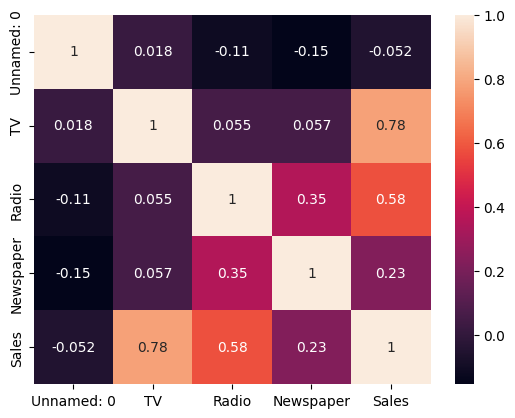

In [11]:
#Correlation Matrix
corr_matrix=dataset.corr()
sns.heatmap(corr_matrix, annot= True)

Scatter Plots

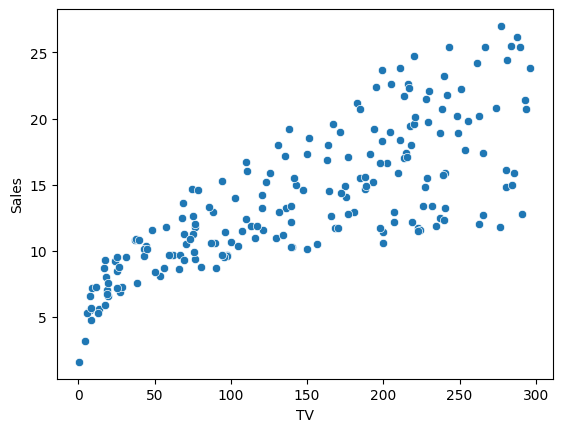

In [12]:
# For Sales v/s TV 
sns.scatterplot(data=dataset, x=dataset['TV'], y=dataset['Sales'])
plt.show()

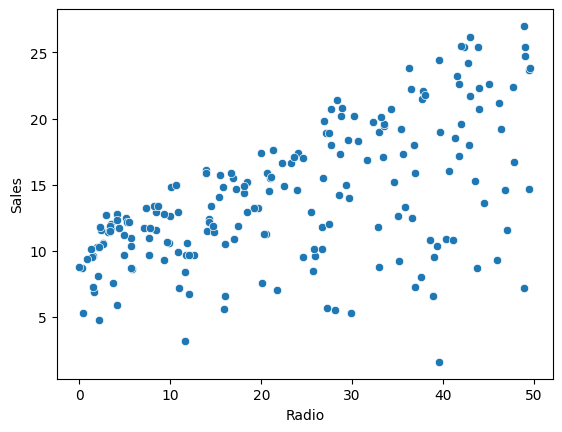

In [13]:
# For Sales v/s Radio 
sns.scatterplot(data=dataset, x=dataset['Radio'], y=dataset['Sales'])
plt.show()

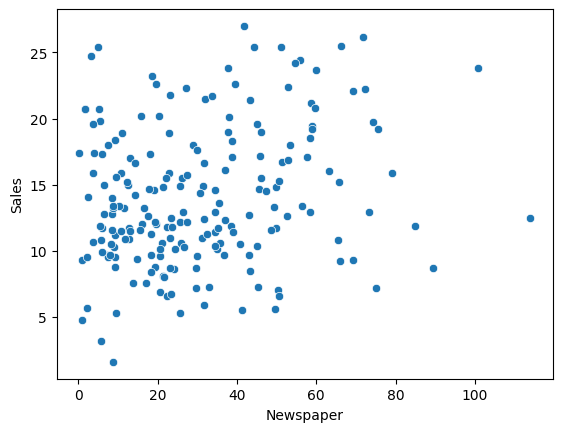

In [14]:
# For Sales v/s Newspaper
sns.scatterplot(data=dataset, x=dataset['Newspaper'], y=dataset['Sales'])
plt.show()

Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X= dataset[['TV', 'Radio', 'Newspaper']]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
Y=dataset['Sales']
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [20]:
# Fitting the Model
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state=0)


In [22]:
model= LinearRegression()
model.fit(X_train,Y_train)

#predictions
Y_predict= model.predict(X_test)
Y_predict

array([10.05866652,  7.43318827,  6.95305695, 24.16874598, 11.98172029,
        6.54464708, 13.19426793, 14.90240334, 11.07675294, 16.25061663,
       23.0081158 ,  9.12072148, 10.29342297, 15.3709661 , 11.62396513,
       12.1057432 , 18.55030805, 10.85810888, 16.13879856, 17.20281404,
       24.25469939,  9.43869821, 15.13419408, 12.41283844,  5.66973859,
       15.23876681, 12.1878762 , 20.95164149, 13.22671807,  9.20954724,
       13.39812727, 21.61944517, 18.05938674, 21.14798547,  6.73582996,
        6.16799717,  7.98042607, 13.09083488, 14.86214078,  6.23597127,
       12.35246911,  9.19452235, 15.04717679, 16.23039254, 17.17240889,
       13.3341216 ,  3.68035786, 12.53946851, 15.93674769,  8.67881357,
       10.62459997, 19.5646526 , 18.3472282 , 15.24662975, 10.04846378,
        8.17344188, 21.49061088, 14.137309  , 16.29760212,  8.90502274])

In [23]:
print(model.intercept_)
print(model.coef_)

2.8802552863313213
[0.04391531 0.20027962 0.00184368]


Model Evaluation


In [25]:
from sklearn import metrics

print("Mean Absolute Error = ",metrics.mean_absolute_error(Y_predict, Y_test))
print("Mean Squared Error = ",metrics.mean_squared_error(Y_predict, Y_test))
print('RMSE = ',np.sqrt(metrics.mean_squared_error(Y_predict, Y_test)))
print('R-Squared = ',metrics.r2_score(Y_predict, Y_test))


Mean Absolute Error =  1.233375952285021
Mean Squared Error =  3.691394845698609
RMSE =  1.9213003007595166
R-Squared =  0.8454397519692016
